<h2>Capstone Project - Car accident severity</h2>

<h4>INTRODUCTION:</h4> We will be using the example dataset given by SDOT Traffic Management Division to predict the car accident severity of Seattle. This city is a place where rainfall is experienced for an average of 18 days/month and it also have high level of humidity and it makes it a perfect place for studying car accident severity due to the weather. Seattle had set a goal that by 2030 they'll have 0% of fatal or serious injuries for car accidents. Although these numbers have decreased through the years it seems very unlikely that the city will reach this goal for 2030. So the purpose of this project Y is to predict the severity of this accidents due to several variables so that the city can take actions accordingly.

<h4>Data Description:</h4> We will be using the example data set given by SDOT Traffic Management Division that contains 194673 rows and 38 columns of data. This columns contains a vast amount of variables such as location, vehicle count, road condition and lightning condition, weather, collision type and many others.The severity of the car accident can be derived from the severity code column.Collision types, date, junction types, whether the collision is due to inattention, whether the driver was under drug or alcohol, weather conditions, road conditions, light conditions, whether or not the pedestrian right of way was not granted, and speeding are the attributes used in the project to determine the severity of car collisions. With these information we'll train the dataset to predict the accident severity due to most of this variables but most of it focused on the weather and road conditions. We'll need to separate this data set to a train dataset and a test dataset to have the best results possible.<br>
<h5>Dataset:</h5><a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"> https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv</a><br>
<h5>MetaData:</h5><a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf"> https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf</a>

<h3>Importing Libraries</h3>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h3>DATA Preprocessing and Cleaning</h3>

In [3]:
df['SEVERITYCODE'].value_counts(normalize=True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

In [4]:
df.drop(['X','Y','OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',\
         'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE','SDOT_COLCODE', 'SDOT_COLDESC','SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],axis=1,inplace=True)
df.head()

,SEVERITYCODE,COLLISIONTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,Angles,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN
1,1,Sideswipe,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,Parked Car,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN
3,1,Other,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN
4,2,Angles,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN


In [5]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['dayofweek'] = df['INCDTTM'].dt.dayofweek 
df['dayofweek'].unique()

array([2, 3, 4, 5, 1, 0, 6])

In [6]:
df['INATTENTIONIND'] = df['INATTENTIONIND'].fillna(0)
df['INATTENTIONIND'].replace(to_replace=['Y'], value=[1],inplace=True)
df['INATTENTIONIND']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        1
23        0
24        0
25        1
26        0
27        0
28        0
29        0
         ..
194643    0
194644    0
194645    0
194646    0
194647    1
194648    0
194649    0
194650    0
194651    0
194652    1
194653    0
194654    0
194655    0
194656    0
194657    0
194658    0
194659    0
194660    0
194661    0
194662    0
194663    1
194664    0
194665    0
194666    0
194667    0
194668    0
194669    1
194670    0
194671    0
194672    0
Name: INATTENTIONIND, Length: 194673, dtype: int64

In [7]:
df['UNDERINFL'] = df['UNDERINFL'].fillna(0)
df['UNDERINFL'].replace(to_replace=['N','Y','0','1'],value=[0,1,0,1],inplace=True)
df['UNDERINFL'].unique()

array([0, 1])

In [8]:
df['PEDROWNOTGRNT'] = df['PEDROWNOTGRNT'].fillna(0)
df['PEDROWNOTGRNT'].replace(to_replace=['Y'],value=[1],inplace=True)
df['PEDROWNOTGRNT'].unique()

array([0, 1])

In [9]:
df['SPEEDING'] = df['SPEEDING'].fillna(0)
df['SPEEDING'].replace(to_replace=['Y'],value=[1],inplace=True)
df['SPEEDING'].unique()

array([0, 1])

In [10]:
df.dropna()
df.drop(['INCDTTM'],axis=1,inplace=True)
df.head()

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,dayofweek
0,2,Angles,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,2
1,1,Sideswipe,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,2
2,1,Parked Car,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,3
3,1,Other,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,4
4,2,Angles,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,2


In [11]:
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
pd.get_dummies(df['COLLISIONTYPE']).head()

,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [12]:
Feature = df[['INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
Feature.head()

,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,dayofweek,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),...,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,0,0,0,0,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
X = Feature
X[0:5]

,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,dayofweek,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),...,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,0,0,0,0,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [15]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.42518348, -0.2217116 , -0.1567239 , -0.22440165, -0.48852801,
        -0.10437651,  1.44892892, -0.2408193 , -0.36412936, -0.92535062,
        -0.02921369, -0.00679952, -0.01696304, -1.15340914, -0.05414257,
        -0.06551471,  2.45445634, -0.00506801, -0.45298634, -0.011333  ,
        -0.02409974, -0.06841713, -0.28988624, -1.33213439, -0.07905204,
        -0.01813462, -0.02604842, -0.01963186, -0.07200071, -0.02431221,
        -0.28975087,  1.76085874, -0.08920831, -0.07872239, -0.576075  ,
        -0.00751719, -0.1141037 ,  0.82233559, -0.17682024, -0.03476509,
        -0.27267986,  2.14811072, -0.16915004, -0.10249953, -0.27517219,
        -0.37234172, -0.57196238, -0.18744809, -0.46074827, -0.12417149,
        -0.32510694],
       [-0.42518348, -0.2217116 , -0.1567239 , -0.22440165, -0.48852801,
        -0.10437651, -0.69016498, -0.2408193 , -0.36412936,  1.08067145,
        -0.02921369, -0.00679952, -0.01696304, -1.15340914, -0.05414257,
        -0.06551471, -0.40742

<h3>METHODOLOGY</h3>

The used data in this project is provided by the coursera capstone project as an example.

We start with preprocessing and cleaning of the data. Irrelevant attributes in the table are dropped, one hot coding is used to convert categorical variables to binary variables. Nan in the columns ['INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING'] are converted to 0.

Then classification method such as K nearest neighbour (KNN) and decision tree are chosen to build and train the model because there're a lot of attributes in this collision datasets and so, comparing and observe the trend of individual attributes will be tedious and ambiguous. 0.2% and 2% of the data are chosen randomly as test and training data to run the notebook faster.

Then finally ,jaccard_similarity_score and f1_score are calculated to evaluate the accuracy of the models.Jaccard similarity score is a measurement of the similarity or overlapping of two datasets. It range from 0% to 100% and 100% means two datasets are identical. F1 score is also an accuracy test which compare the true positive and false positive in the predict dataset. When F1-score equals 1, two datasets are identical.

<h3>KNN</h3>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.002,train_size=0.02, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3893, 51) (3893,)
Test set: (390, 51) (390,)


mean [0.67179487 0.70769231 0.71538462 0.72820513 0.69230769 0.73846154
 0.7025641  0.74615385 0.73589744 0.75128205 0.73076923 0.75128205
 0.73333333 0.74871795 0.73076923 0.76410256 0.74871795 0.75897436
 0.75128205 0.76153846 0.75897436 0.76666667 0.76923077 0.76666667
 0.77179487 0.77179487 0.78205128 0.77435897 0.77692308 0.78461538
 0.78205128 0.78205128 0.78205128 0.78461538 0.77948718 0.77179487
 0.78205128 0.77948718 0.77179487 0.78717949 0.78717949 0.77692308
 0.78205128 0.77948718 0.77948718 0.78205128 0.77435897 0.77692308
 0.76666667] 
std [0.02377709 0.02303085 0.02284897 0.02252761 0.02337091 0.02225356
 0.02314767 0.02203775 0.02232352 0.02188884 0.02246054 0.02188884
 0.02239251 0.0219638  0.02246054 0.02149835 0.0219638  0.02165773
 0.02188884 0.02157858 0.02165773 0.02141704 0.02133462 0.02141704
 0.0212511  0.0212511  0.02090559 0.02116644 0.02108065 0.0208163
 0.02090559 0.02090559 0.02090559 0.0208163  0.02099371 0.0212511
 0.02090559 0.02099371 0.0212511  0.02072

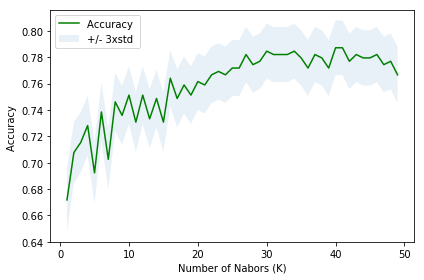

In [18]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print('mean',mean_acc,'\nstd',std_acc)
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [19]:
list(mean_acc).index(mean_acc.max())

39

In [20]:
def KNN(X_test):
    k = 39  #39 is best k
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    return yhat

<h3>DECISION TREE</h3>

In [21]:
from sklearn.tree import DecisionTreeClassifier
!pip install pydotplus 
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [22]:
def decision(X_test):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
    drugTree.fit(X_train,y_train)
    predTree = drugTree.predict(X_test)
    dot_data = StringIO()
    filename = "Data-Collisions.png"
    featureNames = Feature.columns[0:51]
    targetNames = df["SEVERITYCODE"].unique().tolist()
    out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y)),filled=True,  special_characters=True,rotate=False)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img,interpolation='nearest')
    return predTree

<h3>EVALUATION</h3>

In [23]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.002,train_size=0.02, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3893, 51) (3893,)
Test set: (390, 51) (390,)


In [25]:
y

array([2, 1, 1, ..., 2, 2, 1])

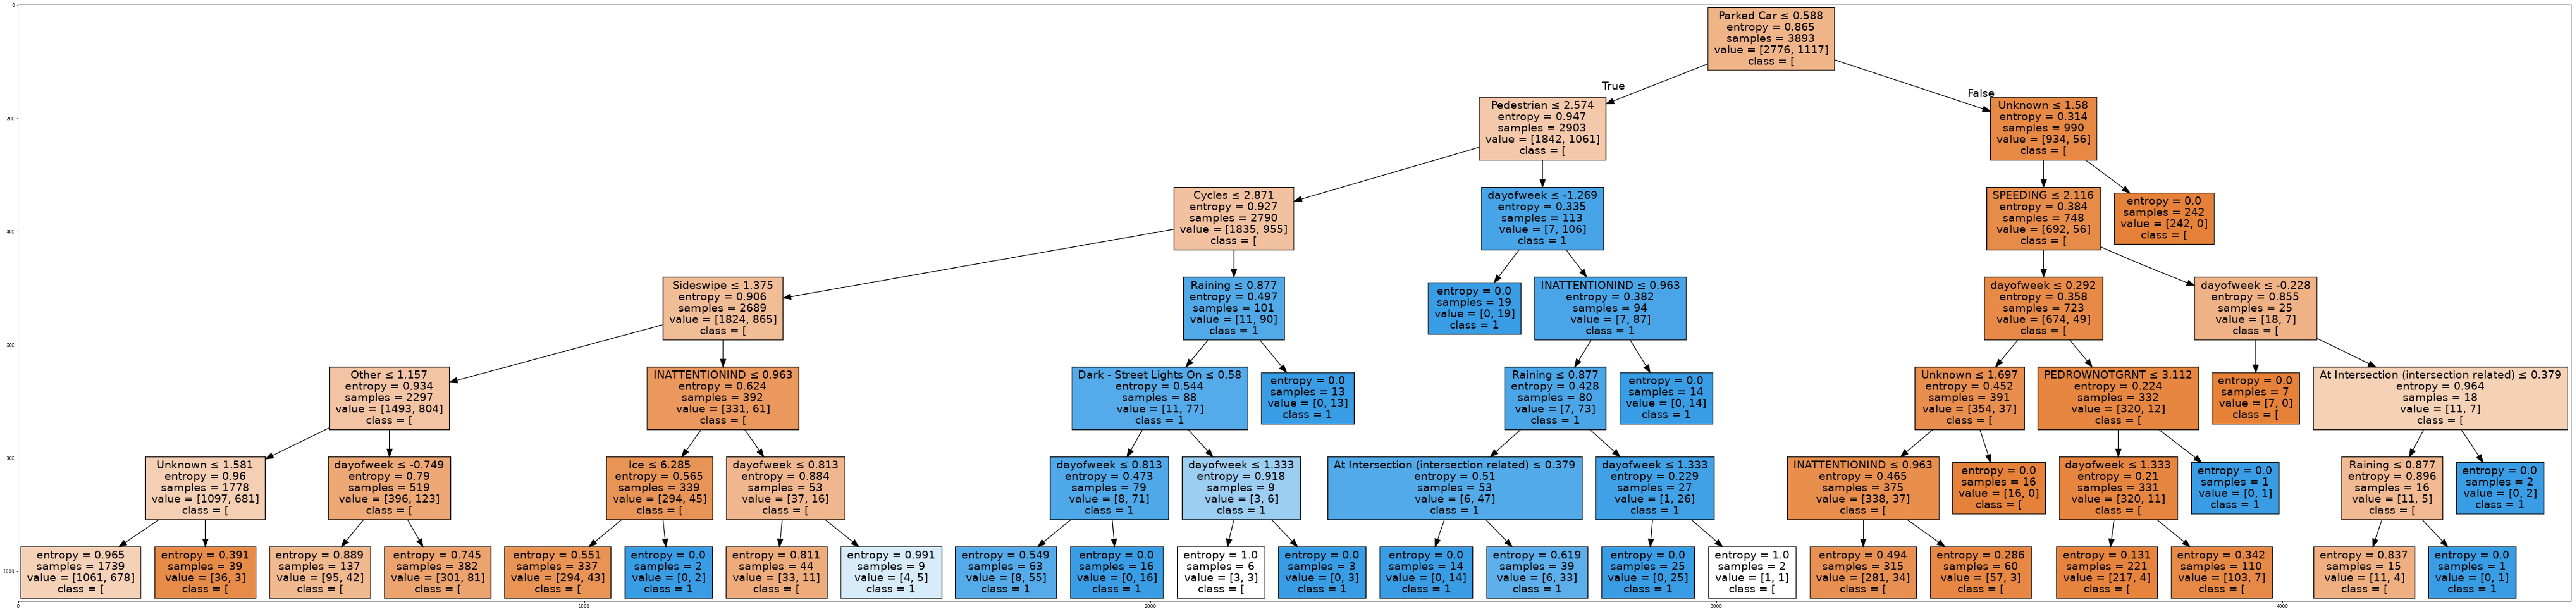

In [26]:
yhat = KNN(X_test)
kj = jaccard_similarity_score(y_test, yhat)
kf = f1_score(y_test,yhat)
yhat = decision(X_test)
dj = jaccard_similarity_score(y_test, yhat)
ddf = f1_score(y_test,yhat)

Report = {'Algorithm':['KNN','Decision Tree'],'Jaccard':[kj,dj],'F1-score':[kf,ddf]}

In [27]:
Report = pd.DataFrame(Report).set_index('Algorithm')
Report

,Jaccard,F1-score
Algorithm,,
KNN,0.771795,0.858954
Decision Tree,0.779487,0.866044


<h3>RESULT</h3>

Jaccard similarity score is a measurement of the similarity or overlapping of two datasets. It range from 0% to 100% and 100% means two datasets are identical. F1 score is also an accuracy test which compare the true positive and false positive in the predict dataset. When F1-score equals 1, two datasets are identical.

KNN has Jaccard score 0.772 and F1-score 0.859.

Decision tree has Jaccard score 0.779 and F1-score 0.867. 

Both the methods had done a decent job in prediction the results.

<h3>DISCUSSION</h3>

Overall, the models built have a good accuracy. Howevever, there are still some improvements we can do in the future. For example, small percentage of the data is chosen to train and predict the model which may affect the accuracy of the results. Although the accuracy of the decision tree is high, it is hard to follow the tree plotted manually. More researches may be required, so that we can drop more features to have a readable tree graph.

<h3>CONCLUSION</h3>

The purpose of the project is to build models to predict car collision severity in seattle. K nearest neighbour and decision tree have a high accuracy and are built successfully.

<h2>THE END</h2>